In [874]:
import numpy as np
import pandas as pd
import seaborn as sns
import math as m

from sklearn import linear_model, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, TimeSeriesSplit, \
                                    cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import GradientBoostingRegressor

import matplotlib.pyplot as plt

%matplotlib inline

In [875]:
import warnings
warnings.filterwarnings('ignore')

In [876]:
train_C2H6 = pd.read_csv('train_data_C2H6.csv', header = 0, sep = ',')
train_C3H8 = pd.read_csv('train_data_C3H8.csv', header = 0, sep = ',')
train_iC4H10 = pd.read_csv('train_data_iC4H10.csv', header = 0, sep = ',')
train_nC4H10 = pd.read_csv('train_data_nC4H10.csv', header = 0, sep = ',')

In [877]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [878]:
train_C2H6

,Cx_A_C2H6,Pe_ef_C2H6,G_B_C2H6
0,-0.489581,0.190170,3.261401
1,-0.246485,0.143749,3.287555
2,-0.170814,0.593639,3.286083
3,-0.233986,4.228007,3.287569
4,-0.301800,0.320362,3.287977
...,...,...,...
5793,0.034875,1.283931,3.613900
5794,0.041494,0.105731,3.619171
5795,0.053704,0.047468,3.627698
5796,0.060286,0.051004,3.638930


In [879]:
col_C2H6 = [i for i in train_C2H6.drop('G_B_C2H6',axis=1).columns]

In [880]:
X_C2H6 = train_C2H6.drop('G_B_C2H6',1)
y_C2H6 = train_C2H6['G_B_C2H6']

scaler_C2H6 = StandardScaler()
scaler_C2H6.fit(X_C2H6, y_C2H6)
X_scaled_C2H6 = scaler_C2H6.transform(X_C2H6)

In [881]:
train_C3H8

,B_rate,Re_A,G_A_C2H6,G_A_C3H8,G_A_iC4H10,G_A_nC4H10,Cx_A_C3H8**2,Cx_A_iC4H10**2,Cx_A_nC4H10**2,sqrt_Pe_ef_C3H8,sqrt_Pe_ef_iC4H10,sqrt_Pe_ef_nC4H10,G_B_C3H8
0,71.591090,406691.601290,3.507886,28.822011,12.256473,16.885985,5.028694,0.032902,0.707197,0.938085,0.225533,0.561008,27.603653
1,71.707246,404402.122607,3.458369,28.179261,12.278466,17.072465,1.484397,0.004709,0.231491,0.650774,0.179067,0.449726,27.783881
2,71.811607,405816.722617,3.520068,28.198436,12.246353,17.025021,0.156325,0.007586,0.097052,0.691400,0.526302,0.825590,27.734744
3,71.904943,407882.237062,3.589369,28.473852,12.208397,16.906464,0.215011,0.013121,0.121494,0.644464,0.796202,1.282295,27.679363
4,71.996468,408308.687585,3.594282,28.625395,12.207304,16.856159,0.631212,0.020599,0.204350,1.572816,0.384088,0.865145,27.624403
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793,72.121189,413983.930391,3.572406,25.245525,11.661197,17.125750,0.341780,0.016146,0.250456,0.676084,0.429058,0.676560,25.788062
5794,72.237662,414147.971365,3.565468,25.309821,11.678729,17.142614,0.294347,0.015368,0.268782,0.615824,0.504972,0.680913,25.830453
5795,72.362225,414636.369811,3.567413,25.362570,11.692550,17.154685,0.271058,0.013704,0.294229,0.617023,0.452487,0.708459,25.881397
5796,72.481486,415123.962871,3.570442,25.424037,11.707783,17.166859,0.269181,0.011038,0.327344,0.602549,0.470335,0.728842,25.950659


In [882]:
col_C3H8 = [i for i in train_C3H8.drop('G_B_C3H8',axis=1).columns]

In [883]:
X_C3H8 = train_C3H8.drop('G_B_C3H8',1)
y_C3H8 = train_C3H8['G_B_C3H8']

scaler_C3H8 = StandardScaler()
scaler_C3H8.fit(X_C3H8, y_C3H8)
X_scaled_C3H8 = scaler_C3H8.transform(X_C3H8)

In [884]:
train_iC4H10

,B_rate,Re_A,G_A_C2H6,G_A_C3H8,G_A_iC4H10,G_A_nC4H10,Cx_A_C3H8**2,Cx_A_iC4H10**2,Cx_A_nC4H10**2,sqrt_Pe_ef_C3H8,sqrt_Pe_ef_iC4H10,sqrt_Pe_ef_nC4H10,G_B_iC4H10
0,71.591090,406691.601290,3.507886,28.822011,12.256473,16.885985,5.028694,0.032902,0.707197,0.938085,0.225533,0.561008,12.325097
1,71.707246,404402.122607,3.458369,28.179261,12.278466,17.072465,1.484397,0.004709,0.231491,0.650774,0.179067,0.449726,12.365565
2,71.811607,405816.722617,3.520068,28.198436,12.246353,17.025021,0.156325,0.007586,0.097052,0.691400,0.526302,0.825590,12.360900
3,71.904943,407882.237062,3.589369,28.473852,12.208397,16.906464,0.215011,0.013121,0.121494,0.644464,0.796202,1.282295,12.351922
4,71.996468,408308.687585,3.594282,28.625395,12.207304,16.856159,0.631212,0.020599,0.204350,1.572816,0.384088,0.865145,12.340423
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793,72.121189,413983.930391,3.572406,25.245525,11.661197,17.125750,0.341780,0.016146,0.250456,0.676084,0.429058,0.676560,11.537228
5794,72.237662,414147.971365,3.565468,25.309821,11.678729,17.142614,0.294347,0.015368,0.268782,0.615824,0.504972,0.680913,11.561665
5795,72.362225,414636.369811,3.567413,25.362570,11.692550,17.154685,0.271058,0.013704,0.294229,0.617023,0.452487,0.708459,11.587488
5796,72.481486,415123.962871,3.570442,25.424037,11.707783,17.166859,0.269181,0.011038,0.327344,0.602549,0.470335,0.728842,11.616500


In [885]:
col_iC4H10 = [i for i in train_iC4H10.drop('G_B_iC4H10',axis=1).columns]

In [886]:
X_iC4H10 = train_iC4H10.drop('G_B_iC4H10',1)
y_iC4H10 = train_iC4H10['G_B_iC4H10']

scaler_iC4H10 = StandardScaler()
scaler_iC4H10.fit(X_iC4H10, y_iC4H10)
X_scaled_iC4H10 = scaler_iC4H10.transform(X_iC4H10)

In [887]:
train_nC4H10

,B_rate,Re_A,G_A_C2H6,G_A_C3H8,G_A_iC4H10,G_A_nC4H10,Cx_A_C3H8**2,Cx_A_iC4H10**2,Cx_A_nC4H10**2,sqrt_Pe_ef_C3H8,sqrt_Pe_ef_iC4H10,sqrt_Pe_ef_nC4H10,G_B_nC4H10
0,71.591090,406691.601290,3.507886,28.822011,12.256473,16.885985,5.028694,0.032902,0.707197,0.938085,0.225533,0.561008,17.367120
1,71.707246,404402.122607,3.458369,28.179261,12.278466,17.072465,1.484397,0.004709,0.231491,0.650774,0.179067,0.449726,17.383997
2,71.811607,405816.722617,3.520068,28.198436,12.246353,17.025021,0.156325,0.007586,0.097052,0.691400,0.526302,0.825590,17.373582
3,71.904943,407882.237062,3.589369,28.473852,12.208397,16.906464,0.215011,0.013121,0.121494,0.644464,0.796202,1.282295,17.358515
4,71.996468,408308.687585,3.594282,28.625395,12.207304,16.856159,0.631212,0.020599,0.204350,1.572816,0.384088,0.865145,17.339268
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793,72.121189,413983.930391,3.572406,25.245525,11.661197,17.125750,0.341780,0.016146,0.250456,0.676084,0.429058,0.676560,17.644192
5794,72.237662,414147.971365,3.565468,25.309821,11.678729,17.142614,0.294347,0.015368,0.268782,0.615824,0.504972,0.680913,17.685043
5795,72.362225,414636.369811,3.567413,25.362570,11.692550,17.154685,0.271058,0.013704,0.294229,0.617023,0.452487,0.708459,17.726825
5796,72.481486,415123.962871,3.570442,25.424037,11.707783,17.166859,0.269181,0.011038,0.327344,0.602549,0.470335,0.728842,17.763570


In [888]:
col_nC4H10 = [i for i in train_nC4H10.drop('G_B_nC4H10', axis=1).columns]

In [889]:
X_nC4H10 = train_nC4H10.drop('G_B_nC4H10',1)
y_nC4H10 = train_nC4H10['G_B_nC4H10']

scaler_nC4H10 = StandardScaler()
scaler_nC4H10.fit(X_nC4H10, y_nC4H10)
X_scaled_nC4H10 = scaler_nC4H10.transform(X_nC4H10)

## Кросс валидация

Обучение / тест

In [890]:
X_train_C2H6, X_test_C2H6, y_train_C2H6, y_test_C2H6 = train_test_split(
    X_scaled_C2H6, y_C2H6, test_size=0.2, shuffle=False, random_state=0)

In [891]:
X_train_C3H8, X_test_C3H8, y_train_C3H8, y_test_C3H8 = train_test_split(
    X_scaled_C3H8, y_C3H8, test_size=0.2, shuffle=False, random_state=0)

In [892]:
X_train_iC4H10, X_test_iC4H10, y_train_iC4H10, y_test_iC4H10 = train_test_split(
    X_scaled_iC4H10, y_iC4H10, test_size=0.2, shuffle=False, random_state=0)

In [893]:
X_train_nC4H10, X_test_nC4H10, y_train_nC4H10, y_test_nC4H10 = train_test_split(
    X_scaled_nC4H10, y_nC4H10, test_size=0.2, shuffle=False, random_state=0)

Стратегии кросс-валидации

In [894]:
cv_strategy_KFold = KFold(n_splits=5, random_state=0, shuffle=False)
cv_strategy_TMS = TimeSeriesSplit(n_splits=5)

Загружаем метрику качества

In [895]:
scorer = metrics.make_scorer(metrics.mean_absolute_error)
scorerCV = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better=False)

# linear_regressor

### C2H6

In [896]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train_C2H6, y_train_C2H6)
predictions = linear_regressor.predict(X_test_C2H6)

In [897]:
metrics.mean_absolute_error(y_test_C2H6, predictions)

3.0246117405476407

In [898]:
lr_scoring = cross_val_score(linear_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (KFold) mean:0.8426594205897538, max:1.854412032495994, min:0.3890787211782451, std:0.5283447943537979


In [899]:
lr_scoring

array([0.8490587 , 1.85441203, 0.61932738, 0.38907872, 0.50142027])

In [900]:
lr_scoring = cross_val_score(linear_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (TMS) mean:0.9149238330643662, max:1.702612988231826, min:0.3282031361453393, std:0.586899538221614


In [901]:
lr_scoring

array([1.70261299, 1.54823107, 0.43269402, 0.32820314, 0.56287795])

### C3H8

In [902]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train_C3H8, y_train_C3H8)
predictions = linear_regressor.predict(X_test_C3H8)

In [903]:
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.8242943495244528

In [904]:
lr_scoring = cross_val_score(linear_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (KFold) mean:1.6364280799335522, max:5.1869207309197325, min:0.4650886025011178, std:1.7854415986190961


In [905]:
lr_scoring

array([0.77695207, 5.18692073, 1.06039091, 0.4650886 , 0.69278808])

In [906]:
lr_scoring = cross_val_score(linear_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (TMS) mean:3.663082181344284, max:14.782940761874375, min:0.4737863317132307, std:5.573971595847967


In [907]:
lr_scoring

array([14.78294076,  1.62668618,  0.47378633,  0.76807806,  0.66391957])

### iC4H10

In [908]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train_iC4H10, y_train_iC4H10)
predictions = linear_regressor.predict(X_test_iC4H10)

In [909]:
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.9355681348132701

In [910]:
lr_scoring = cross_val_score(linear_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (KFold) mean:0.5805123317424916, max:1.9141828427200223, min:0.15778951703877667, std:0.6722042549435101


In [911]:
lr_scoring

array([0.15778952, 1.91418284, 0.23917287, 0.18804719, 0.40336924])

In [912]:
lr_scoring = cross_val_score(linear_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (TMS) mean:3.5217852236858618, max:16.419411166476223, min:0.15023770327630406, std:6.449399626778427


In [913]:
lr_scoring

array([16.41941117,  0.32472075,  0.1502377 ,  0.29301295,  0.42154355])

### nC4H10

In [914]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train_nC4H10, y_train_nC4H10)
predictions = linear_regressor.predict(X_test_nC4H10)

In [915]:
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.2698502503165572

In [916]:
lr_scoring = cross_val_score(linear_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (KFold) mean:0.8700982990185112, max:3.1452781909067165, min:0.23517837521970472, std:1.13856282515911


In [917]:
lr_scoring

array([0.26934989, 3.14527819, 0.32949914, 0.23517838, 0.3711859 ])

In [918]:
lr_scoring = cross_val_score(linear_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (TMS) mean:3.039421993538384, max:13.739212828038026, min:0.21903407681325818, std:5.350528432793523


In [919]:
lr_scoring

array([13.73921283,  0.47290983,  0.37131731,  0.21903408,  0.39463592])

# lasso_regressor

### C2H6

In [920]:
lasso_regressor = linear_model.Lasso(random_state=0)
lasso_regressor.fit(X_train_C2H6, y_train_C2H6)
predictions = lasso_regressor.predict(X_test_C2H6)

In [921]:
metrics.mean_absolute_error(y_test_C2H6, predictions)

2.160635055064188

In [922]:
ls_scoring = cross_val_score(lasso_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (TMS)) mean:0.8166752692831993, max:1.3573229747620663, min:0.3225992593174646, std:0.40439029951170297


In [923]:
ls_scoring

array([1.35732297, 1.22299428, 0.6726811 , 0.50777873, 0.32259926])

In [924]:
lasso_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [925]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [926]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [927]:
%%time
grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 750 ms


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [928]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=1e-05, warm_start=False)

In [929]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-0.7824760941679109
{'alpha': 0.5, 'max_iter': 500, 'tol': 1e-05}


In [930]:
predictions = grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

2.160635055064188

In [931]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [932]:
%%time
grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 758 ms


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [933]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=1e-05, warm_start=False)

In [934]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-0.8166752692831994
{'alpha': 0.5, 'max_iter': 500, 'tol': 1e-05}


In [935]:
predictions = grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

2.160635055064188

### C3H8

In [936]:
lasso_regressor = linear_model.Lasso(random_state=0)
lasso_regressor.fit(X_train_C3H8, y_train_C3H8)
predictions = lasso_regressor.predict(X_test_C3H8)

In [937]:
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.6651071559158253

In [938]:
ls_scoring = cross_val_score(lasso_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (KFold)) mean:2.8340178193781633, max:10.194233284580378, min:0.32335360285457354, std:3.700276798721592


In [939]:
ls_scoring

array([ 1.1708592 , 10.19423328,  1.50670667,  0.3233536 ,  0.97493633])

In [940]:
ls_scoring = cross_val_score(lasso_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (TMS)) mean:2.6085429971097116, max:7.7018155776801835, min:0.4550719728421791, std:2.770795794916527


In [941]:
ls_scoring

array([7.70181558, 3.43954826, 0.45507197, 0.66140679, 0.78487239])

In [942]:
lasso_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [943]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [944]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [945]:
%%time
grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 1.15 s


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [946]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [947]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-2.231794099728587
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [948]:
predictions = grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.713296449045317

In [949]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [950]:
%%time
grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 1.13 s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [951]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [952]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-2.604096799145661
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [953]:
predictions = grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.713296449045317

### iC4H10

In [954]:
lasso_regressor = linear_model.Lasso(random_state=0)
lasso_regressor.fit(X_train_iC4H10, y_train_iC4H10)
predictions = lasso_regressor.predict(X_test_iC4H10)

In [955]:
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.9333868510046126

In [956]:
ls_scoring = cross_val_score(lasso_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (KFold)) mean:1.2810734123288263, max:4.572704732033658, min:0.3129721481235549, std:1.6487256615879988


In [957]:
ls_scoring

array([0.57105206, 4.57270473, 0.55674856, 0.31297215, 0.39188956])

In [958]:
ls_scoring = cross_val_score(lasso_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (TMS)) mean:1.1954363490239308, max:2.868031934677872, min:0.23358410938260632, std:1.0972631424107355


In [959]:
ls_scoring

array([2.86803193, 2.14763455, 0.30140522, 0.23358411, 0.42652594])

In [960]:
lasso_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [961]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [962]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [963]:
%%time
grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 1.18 s


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [964]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=1e-05, warm_start=False)

In [965]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.1649954424692102
{'alpha': 0.5, 'max_iter': 500, 'tol': 1e-05}


In [966]:
predictions = grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.8342777944462326

In [967]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [968]:
%%time
grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 1.56 s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [969]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [970]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.0925199731010429
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [971]:
predictions = grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.8342777944462326

### nC4H10

In [972]:
lasso_regressor = linear_model.Lasso(random_state=0)
lasso_regressor.fit(X_train_nC4H10, y_train_nC4H10)
predictions = lasso_regressor.predict(X_test_nC4H10)

In [973]:
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.3133927241337715

In [974]:
ls_scoring = cross_val_score(lasso_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (KFold)) mean:1.5798065016917804, max:6.395014553392381, min:0.2913427543876322, std:2.408030512879343


In [975]:
ls_scoring

array([0.42342055, 6.39501455, 0.38569659, 0.29134275, 0.40355806])

In [976]:
ls_scoring = cross_val_score(lasso_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (TMS)) mean:1.524585360110542, max:3.8607101479163926, min:0.2396636221198513, std:1.5213109765038015


In [977]:
ls_scoring

array([3.86071015, 2.82382084, 0.23966362, 0.2683134 , 0.43041879])

In [978]:
lasso_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [979]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [980]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [981]:
%%time
grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 1.22 s


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [982]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=1e-05, warm_start=False)

In [983]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.5023987983717684
{'alpha': 0.5, 'max_iter': 500, 'tol': 1e-05}


In [984]:
predictions = grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.1919196697303216

In [985]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [986]:
%%time
grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 1.53 s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [987]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [988]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.4391146835173148
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [989]:
predictions = grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.1919196697303216

# Ridge regressor

### C2H6

In [990]:
ridge_regressor = linear_model.Ridge(random_state=0)
ridge_regressor.fit(X_train_C2H6, y_train_C2H6)
predictions = ridge_regressor.predict(X_test_C2H6)

In [991]:
metrics.mean_absolute_error(y_test_C2H6, predictions)

3.022289138416155

In [992]:
rd_scoring = cross_val_score(ridge_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(rd_scoring .mean(), rd_scoring .max(), 
                                                     rd_scoring .min(), rd_scoring .std()))

LR (KFold)) mean:0.8418318014294934, max:1.8512367062935413, min:0.389420206103247, std:0.5272317565638073


In [993]:
rd_scoring

array([0.84927378, 1.85123671, 0.61853415, 0.38942021, 0.50069416])

In [994]:
rd_scoring = cross_val_score(ridge_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(rd_scoring .mean(), rd_scoring .max(), 
                                                     rd_scoring .min(), rd_scoring .std()))

LR (KFold)) mean:0.9015442606895228, max:1.641027810838306, min:0.32847798410681817, std:0.5693226304770311


In [995]:
rd_scoring

array([1.64102781, 1.54268052, 0.43345049, 0.32847798, 0.5620845 ])

In [996]:
ridge_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol'])

In [997]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [998]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [999]:
%%time
grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 859 ms


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [1000]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=1e-05, warm_start=False)

In [1001]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-0.7824760941679109
{'alpha': 0.5, 'max_iter': 500, 'tol': 1e-05}


In [1002]:
predictions = grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

2.160635055064188

In [1003]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [1004]:
%%time
grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 787 ms


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [1005]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=1e-05, warm_start=False)

In [1006]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-0.8166752692831994
{'alpha': 0.5, 'max_iter': 500, 'tol': 1e-05}


In [1007]:
predictions = grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

2.160635055064188

### C3H8

In [1008]:
ridge_regressor = linear_model.Ridge(random_state=0)
ridge_regressor.fit(X_train_C3H8, y_train_C3H8)
predictions = ridge_regressor.predict(X_test_C3H8)

In [1009]:
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.8449571855501428

In [1010]:
rd_scoring = cross_val_score(ridge_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(rd_scoring .mean(), rd_scoring .max(), 
                                                     rd_scoring .min(), rd_scoring .std()))

LR (KFold)) mean:1.7590157111457736, max:5.78303627645629, min:0.44344008062274176, std:2.0219444677159717


In [1011]:
rd_scoring

array([0.75981056, 5.78303628, 1.07564878, 0.44344008, 0.73314287])

In [1012]:
rd_scoring = cross_val_score(ridge_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(rd_scoring .mean(), rd_scoring .max(), 
                                                     rd_scoring .min(), rd_scoring .std()))

LR (KFold)) mean:1.554336634588043, max:4.6113542032811985, min:0.48174772656515896, std:1.5477669306836261


In [1013]:
rd_scoring

array([4.6113542 , 1.21319806, 0.48174773, 0.82081735, 0.64456583])

In [1014]:
ridge_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol'])

In [1015]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [1016]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [1017]:
%%time
grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 1.15 s


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [1018]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [1019]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-2.231794099728587
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [1020]:
predictions = grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.713296449045317

In [1021]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [1022]:
%%time
grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 1.03 s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [1023]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [1024]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-2.604096799145661
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [1025]:
predictions = grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.713296449045317

### iC4H10

In [1026]:
ridge_regressor = linear_model.Ridge(random_state=0)
ridge_regressor.fit(X_train_iC4H10, y_train_iC4H10)
predictions = ridge_regressor.predict(X_test_iC4H10)

In [1027]:
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.9304955208168008

In [1028]:
rd_scoring = cross_val_score(ridge_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(rd_scoring .mean(), rd_scoring .max(), 
                                                     rd_scoring .min(), rd_scoring .std()))

LR (KFold)) mean:0.5476641816436202, max:1.7682730508581679, min:0.15897440811073535, std:0.6150160918983028


In [1029]:
rd_scoring

array([0.15897441, 1.76827305, 0.24040077, 0.1899015 , 0.38077118])

In [1030]:
rd_scoring = cross_val_score(ridge_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(rd_scoring .mean(), rd_scoring .max(), 
                                                     rd_scoring .min(), rd_scoring .std()))

LR (KFold)) mean:0.5309090560762219, max:1.0496291908066764, min:0.15306371116650935, std:0.32273061129793534


In [1031]:
rd_scoring

array([1.04962919, 0.73862664, 0.15306371, 0.30644994, 0.4067758 ])

In [1032]:
ridge_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol'])

In [1033]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [1034]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [1035]:
%%time
grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 1.16 s


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [1036]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=1e-05, warm_start=False)

In [1037]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.1649954424692102
{'alpha': 0.5, 'max_iter': 500, 'tol': 1e-05}


In [1038]:
predictions = grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.8342777944462326

In [1039]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [1040]:
%%time
grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 1.48 s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [1041]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [1042]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.0925199731010429
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [1043]:
predictions = grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.8342777944462326

### nC4H10

In [1044]:
ridge_regressor = linear_model.Ridge(random_state=0)
ridge_regressor.fit(X_train_nC4H10, y_train_nC4H10)
predictions = ridge_regressor.predict(X_test_nC4H10)

In [1045]:
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.272075766997528

In [1046]:
rd_scoring = cross_val_score(ridge_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(rd_scoring .mean(), rd_scoring .max(), 
                                                     rd_scoring .min(), rd_scoring .std()))

LR (KFold)) mean:0.7095936851087323, max:2.347911553130697, min:0.23415808522715423, std:0.8206265695406924


In [1047]:
rd_scoring

array([0.26451689, 2.34791155, 0.32519893, 0.23415809, 0.37618296])

In [1048]:
rd_scoring = cross_val_score(ridge_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(rd_scoring .mean(), rd_scoring .max(), 
                                                     rd_scoring .min(), rd_scoring .std()))

LR (KFold)) mean:0.6063486289489578, max:1.129130473753545, min:0.21803377349587721, std:0.3561707757308177


In [1049]:
rd_scoring

array([1.12913047, 0.92940931, 0.35345144, 0.21803377, 0.40171815])

In [1050]:
ridge_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol'])

In [1051]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [1052]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [1053]:
%%time
grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 1.15 s


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [1054]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=1e-05, warm_start=False)

In [1055]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.5023987983717684
{'alpha': 0.5, 'max_iter': 500, 'tol': 1e-05}


In [1056]:
predictions = grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.1919196697303216

In [1057]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [1058]:
%%time
grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 1.58 s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [1059]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [1060]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.4391146835173148
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [1061]:
predictions = grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.1919196697303216

# SGDRegressor

### C2H6

In [1062]:
SGD_regressor = linear_model.SGDRegressor(shuffle=False, random_state=0)
#SGD_regressor = linear_model.SGDRegressor(shuffle=False,tol=0.5, power_t=0.15, penalty='l2', 
#                                          eta0= 0.1, alpha= 0.0001, random_state=0)

SGD_regressor.fit(X_train_C2H6, y_train_C2H6)
predictions = SGD_regressor.predict(X_test_C2H6)

In [1063]:
metrics.mean_absolute_error(y_test_C2H6, predictions)

3.223429777931039

In [1064]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer , cv = cv_strategy_KFold)
print ('SGD (KFold) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (KFold) mean:0.7808541810610398, max:1.5509676120479956, min:0.44337828415547903, std:0.3956863146097772


In [1065]:
SGD_scoring

array([0.72074323, 1.55096761, 0.63248725, 0.44337828, 0.55669454])

In [1066]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_TMS)
print ('SGD (TMS) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (TMS) mean:0.8302627524691184, max:1.341026450530759, min:0.3481430663519423, std:0.3525794840918707


In [1067]:
SGD_scoring

array([1.10485849, 1.34102645, 0.73721983, 0.34814307, 0.62006592])

In [1068]:
SGD_regressor.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [1069]:
parameters_grid = {
    'penalty' : ['l1', 'l2'],
    'alpha' : [0.00005, 0.0001, 0.001,0.0001],
    'eta0' : [0.001, 0.005, 0.01, 0.05, 0.1],
     'tol' : [0.5,1, 1.5],
    'power_t' : [0.15,0.2,0.25, 0.3], 
    
}

In [1070]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_KFold, n_iter = 200, random_state=0)

In [1071]:
%%time
randomized_grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 9.03 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          sh...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 

In [1072]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=5e-05, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.001, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.15, random_state=0,
             shuffle=False, tol=1.5, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [1073]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-0.7320181154110683
{'tol': 1.5, 'power_t': 0.15, 'penalty': 'l2', 'eta0': 0.001, 'alpha': 5e-05}


In [1074]:
predictions = randomized_grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

2.8218706483066374

In [1075]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_TMS, n_iter = 200, random_state=0)

In [1076]:
%%time
randomized_grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 7.13 s


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          s...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0

In [1077]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.15, random_state=0,
             shuffle=False, tol=0.5, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [1078]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-0.5118773980313367
{'tol': 0.5, 'power_t': 0.15, 'penalty': 'l2', 'eta0': 0.1, 'alpha': 0.0001}


In [1079]:
predictions = randomized_grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

2.1711872772448677

### C3H8

In [1080]:
SGD_regressor = linear_model.SGDRegressor(shuffle=False, random_state=0)
#SGD_regressor = linear_model.SGDRegressor(shuffle=False,tol=0.25, power_t=0.2, penalty='l2', 
#                                          eta0= 0.1, alpha= 0.001, random_state=0)

SGD_regressor.fit(X_train_C3H8, y_train_C3H8)
predictions = SGD_regressor.predict(X_test_C3H8)

In [1081]:
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.8286209978152967

In [1082]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer , cv = cv_strategy_KFold)
print ('SGD (KFold) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (KFold) mean:1.5486737127644088, max:4.372053981362505, min:0.35314970798019957, std:1.4488789619102176


In [1083]:
SGD_scoring

array([0.90772632, 4.37205398, 1.36961499, 0.35314971, 0.74082357])

In [1084]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_TMS)
print ('SGD (TMS) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (TMS) mean:8.049167837509653, max:36.689009405453525, min:0.4684333665964056, std:14.325933252614824


In [1085]:
SGD_scoring

array([36.68900941,  1.66714036,  0.62359404,  0.79766201,  0.46843337])

In [1086]:
SGD_regressor.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [1087]:
parameters_grid = {
    'penalty' : ['l1', 'l2'],
    'alpha' : [0.00005, 0.0001, 0.001,0.0001],
    'eta0' : [0.001, 0.005, 0.01, 0.05, 0.1],
     'tol' : [0.25,0.5,1, 1.5],
    'power_t' : [0.15,0.2,0.25, 0.3], 
    
}

In [1088]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV, 
                                        cv = cv_strategy_KFold, n_iter = 200, random_state=0)

In [1089]:
%%time
randomized_grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 24.5 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          sh...
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0.005, 0.01, 0.05, 0.1],
                                    

In [1090]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.05, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.15, random_state=0,
             shuffle=False, tol=0.5, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [1091]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-2.632285976740567
{'tol': 0.5, 'power_t': 0.15, 'penalty': 'l2', 'eta0': 0.05, 'alpha': 0.001}


In [1092]:
predictions = randomized_grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.5093748523793953

In [1093]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV, 
                                        cv = cv_strategy_TMS, n_iter = 200, random_state=0)

In [1094]:
%%time
randomized_grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 15.9 s


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          s...
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0.005, 0.01, 0.05, 0.1],
                                     

In [1095]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l1', power_t=0.2, random_state=0,
             shuffle=False, tol=0.25, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [1096]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-9.066809467279775
{'tol': 0.25, 'power_t': 0.2, 'penalty': 'l1', 'eta0': 0.1, 'alpha': 0.001}


In [1097]:
predictions = randomized_grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

2.8314712194382574

### iC4H10

In [1098]:
SGD_regressor = linear_model.SGDRegressor(shuffle=False, random_state=0)
#SGD_regressor = linear_model.SGDRegressor(shuffle=False,tol=1, power_t=0.2, penalty='l2', 
#                                          eta0= 0.1, alpha= 0.001, random_state=0)

SGD_regressor.fit(X_train_iC4H10, y_train_iC4H10)
predictions = SGD_regressor.predict(X_test_iC4H10)

In [1099]:
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.9509201606106973

In [1100]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer , cv = cv_strategy_KFold)
print ('SGD (KFold) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (KFold) mean:1.3777429663553082, max:5.984026864371929, min:0.1555007029825834, std:2.3040689198805575


In [1101]:
SGD_scoring

array([0.1555007 , 5.98402686, 0.22507761, 0.17903987, 0.34506979])

In [1102]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('SGD (TMS) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (TMS) mean:3.9582022522472124, max:18.472085671245686, min:0.17132021028836442, std:7.258268108543571


In [1103]:
SGD_scoring

array([18.47208567,  0.56288214,  0.17132021,  0.20864057,  0.37608266])

In [1104]:
SGD_regressor.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [1105]:
parameters_grid = {
    'penalty' : ['l1', 'l2'],
    'alpha' : [0.00005, 0.0001, 0.001,0.0001],
    'eta0' : [0.001, 0.005, 0.01, 0.05, 0.1],
     'tol' : [0.5,1, 1.5],
    'power_t' : [0.15,0.2,0.25, 0.3], 
    
}

In [1106]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_KFold, n_iter = 200, random_state=0)

In [1107]:
%%time
randomized_grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 24.8 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          sh...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 

In [1108]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.05, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l1', power_t=0.15, random_state=0,
             shuffle=False, tol=1, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [1109]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-1.4101229291206203
{'tol': 1, 'power_t': 0.15, 'penalty': 'l1', 'eta0': 0.05, 'alpha': 0.001}


In [1110]:
predictions = randomized_grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.6919892465468686

In [1111]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_TMS, n_iter = 200, random_state=0)

In [1112]:
%%time
randomized_grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 16.6 s


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          s...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0

In [1113]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.2, random_state=0,
             shuffle=False, tol=1, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [1114]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-4.415966417210468
{'tol': 1, 'power_t': 0.2, 'penalty': 'l2', 'eta0': 0.1, 'alpha': 0.001}


In [1115]:
predictions = randomized_grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

1.1587457465152966

### nC4H10

In [1116]:
SGD_regressor = linear_model.SGDRegressor(shuffle=False, random_state=0)
#SGD_regressor = linear_model.SGDRegressor(shuffle=False,tol=0.5, power_t=0.15, penalty='l2', 
#                                          eta0= 0.05, alpha= 0.001, random_state=0)

SGD_regressor.fit(X_train_nC4H10, y_train_nC4H10)
predictions = SGD_regressor.predict(X_test_nC4H10)

In [1117]:
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.4247802449575515

In [1118]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer , cv = cv_strategy_KFold)
print ('SGD (KFold) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (KFold) mean:1.7245262597193332, max:7.407119932185212, min:0.23607502526424176, std:2.84179652618471


In [1119]:
SGD_scoring

array([0.2602252 , 7.40711993, 0.33235683, 0.23607503, 0.38685432])

In [1120]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('SGD (TMS) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (TMS) mean:5.5284031795006054, max:25.816641634025654, min:0.3270275610208852, std:10.145367311304057


In [1121]:
SGD_scoring

array([25.81664163,  0.76002369,  0.33402428,  0.32702756,  0.40429873])

In [1122]:
SGD_regressor.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [1123]:
parameters_grid = {
    'penalty' : ['l1', 'l2'],
    'alpha' : [0.00005, 0.0001, 0.001,0.0001],
    'eta0' : [0.001, 0.005, 0.01, 0.05,0.1],
     'tol' : [0.25,0.5,1, 1.5],
    'power_t' : [0.15,0.2,0.25, 0.3], 
    
}

In [1124]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_KFold, n_iter = 200, random_state=0)

In [1125]:
%%time
randomized_grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 25.1 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          sh...
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0.005, 0.01, 0.05, 0.1],
                                    

In [1126]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.05, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.15, random_state=0,
             shuffle=False, tol=0.5, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [1127]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-1.7794421885156662
{'tol': 0.5, 'power_t': 0.15, 'penalty': 'l2', 'eta0': 0.05, 'alpha': 0.001}


In [1128]:
predictions = randomized_grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

0.9355472405193754

In [1129]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_TMS, n_iter = 200, random_state=0)

In [1130]:
%%time
randomized_grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 16.6 s


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          s...
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0.005, 0.01, 0.05, 0.1],
                                     

In [1131]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.05, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.15, random_state=0,
             shuffle=False, tol=0.5, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [1132]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-6.134487035809981
{'tol': 0.5, 'power_t': 0.15, 'penalty': 'l2', 'eta0': 0.05, 'alpha': 0.001}


In [1133]:
predictions = randomized_grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

0.9355472405193754

# GradientBoostingRegressor

### C2H6

In [1134]:
estimator = GradientBoostingRegressor(random_state=0)
estimator.fit(X_train_C2H6, y_train_C2H6)
predictions = estimator.predict(X_test_C2H6)

In [1135]:
metrics.mean_absolute_error(y_test_C2H6, predictions)

1.8798375980556714

In [1136]:
GBR_scoring = cross_val_score(estimator, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_KFold)
print ('GBR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (KFold) mean:0.7445223367552175, max:1.6629482929855002, min:0.3127689376391962, std:0.4775424359164478


In [1137]:
GBR_scoring

array([0.66474497, 1.66294829, 0.43819039, 0.31276894, 0.64395909])

In [1138]:
GBR_scoring = cross_val_score(estimator, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_TMS)
print ('GBR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (TMS) mean:0.7593128400127369, max:1.4430081536756054, min:0.24601009780462044, std:0.4608517957799587


In [1139]:
GBR_scoring

array([1.44300815, 1.08905305, 0.2460101 , 0.28878342, 0.72970948])

In [1140]:
estimator.get_params().keys()

dict_keys(['alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [1141]:
parameters_grid = {
    'n_estimators' : [50, 100, 200, 500],
    'max_depth' : [3, 5, 10, 15],
    
}

In [1142]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_KFold, n_iter = 20, random_state = 0)

In [1143]:
#%%time
#randomized_grid_cv.fit(X_train_C2H6, y_train_C2H6)

In [1144]:
#randomized_grid_cv.best_estimator_

In [1145]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [1146]:
#predictions = randomized_grid_cv.predict(X_test_C2H6)
#metrics.mean_absolute_error(y_test_C2H6, predictions)

In [1147]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_TMS, n_iter = 20, random_state = 0)

In [1148]:
#%%time
#randomized_grid_cv.fit(X_train_C2H6, y_train_C2H6)

In [1149]:
#randomized_grid_cv.best_estimator_

In [1150]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [1151]:
#predictions = randomized_grid_cv.predict(X_test_C2H6)
#metrics.mean_absolute_error(y_test_C2H6, predictions)

### C3H8

In [1152]:
estimator = GradientBoostingRegressor(random_state=0)
estimator.fit(X_train_C3H8, y_train_C3H8)
predictions = estimator.predict(X_test_C3H8)

In [1153]:
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.711376148364079

In [1154]:
GBR_scoring = cross_val_score(estimator, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_KFold)
print ('GBR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (KFold) mean:0.9803892587464718, max:1.8063672117137808, min:0.4781131754756656, std:0.44829760935707463


In [1155]:
GBR_scoring

array([0.82348545, 1.80636721, 1.02309195, 0.47811318, 0.77088851])

In [1156]:
GBR_scoring = cross_val_score(estimator, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_TMS)
print ('GBR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (TMS) mean:2.2480711628591314, max:6.578835283132298, min:0.5973613454353496, std:2.2892821852055065


In [1157]:
GBR_scoring

array([6.57883528, 2.59241392, 0.61008886, 0.8616564 , 0.59736135])

In [1158]:
estimator.get_params().keys()

dict_keys(['alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [1159]:
parameters_grid = {
    'n_estimators' : [50, 100, 200, 500],
    'max_depth' : [3, 5, 10, 15],
    
}

In [1160]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_KFold, n_iter = 20, random_state = 0)

In [1161]:
#%%time
#randomized_grid_cv.fit(X_train_C3H8, y_train_C3H8)

In [1162]:
#randomized_grid_cv.best_estimator_

In [1163]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [1164]:
#predictions = randomized_grid_cv.predict(X_test_C3H8)
#metrics.mean_absolute_error(y_test_C3H8, predictions)

In [1165]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer, 
#                                        cv = cv_strategy_TMS, n_iter = 20, random_state = 0)

In [1166]:
#%%time
#randomized_grid_cv.fit(X_train_C3H8, y_train_C3H8)

In [1167]:
#randomized_grid_cv.best_estimator_

In [1168]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [1169]:
#predictions = randomized_grid_cv.predict(X_test_C3H8)
#metrics.mean_absolute_error(y_test_C3H8, predictions)

### iC4H10

In [1170]:
estimator = GradientBoostingRegressor(random_state=0)
estimator.fit(X_train_iC4H10, y_train_iC4H10)
predictions = estimator.predict(X_test_iC4H10)

In [1171]:
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.8095697957517684

In [1172]:
GBR_scoring = cross_val_score(estimator, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('GBR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (KFold) mean:0.41875205984416486, max:0.9592175265719015, min:0.21822219603589557, std:0.2731679756482865


In [1173]:
GBR_scoring

array([0.32223349, 0.95921753, 0.26665599, 0.2182222 , 0.3274311 ])

In [1174]:
GBR_scoring = cross_val_score(estimator, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('GBR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (TMS) mean:0.9133842632226401, max:2.5322641560587416, min:0.2061812676308953, std:0.8809292341838779


In [1175]:
GBR_scoring

array([2.53226416, 1.17505102, 0.20618127, 0.29181083, 0.36161405])

In [1176]:
estimator.get_params().keys()

dict_keys(['alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [1177]:
parameters_grid = {
    'n_estimators' : [50, 100, 200, 500],
    'max_depth' : [3, 5, 10, 15],
    
}

In [1178]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_KFold, n_iter = 20, random_state = 0)

In [1179]:
#%%time
#randomized_grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

In [1180]:
#randomized_grid_cv.best_estimator_

In [1181]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [1182]:
#predictions = randomized_grid_cv.predict(X_test_iC4H10)
#metrics.mean_absolute_error(y_test_iC4H10, predictions)

In [1183]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_TMS, n_iter = 20, random_state = 0)

In [1184]:
#%%time
#randomized_grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

In [1185]:
#randomized_grid_cv.best_estimator_

In [1186]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [1187]:
#predictions = randomized_grid_cv.predict(X_test_iC4H10)
#metrics.mean_absolute_error(y_test_iC4H10, predictions)

### nC4H10

In [1188]:
estimator = GradientBoostingRegressor(random_state=0)
estimator.fit(X_train_nC4H10, y_train_nC4H10)
predictions = estimator.predict(X_test_nC4H10)

In [1189]:
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.1366726420780149

In [1190]:
GBR_scoring = cross_val_score(estimator, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('GBR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (KFold) mean:0.522805953771017, max:1.3470633711288518, min:0.17246427773121684, std:0.4203725308481294


In [1191]:
GBR_scoring = cross_val_score(estimator, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('GBR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (TMS) mean:1.2978848261682394, max:3.57587062402793, min:0.2633581121222209, std:1.2905715274570575


In [1192]:
GBR_scoring

array([3.57587062, 1.9009107 , 0.37746899, 0.26335811, 0.37181571])

In [1193]:
estimator.get_params().keys()

dict_keys(['alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [1194]:
parameters_grid = {
    'n_estimators' : [50, 100, 200, 500],
    'max_depth' : [3, 5, 10, 15],
    
}

In [1195]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_KFold, n_iter = 20, random_state = 0)

In [1196]:
#%%time
#randomized_grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

In [1197]:
#randomized_grid_cv.best_estimator_

In [1198]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [1199]:
#predictions = randomized_grid_cv.predict(X_test_nC4H10)
#metrics.mean_absolute_error(y_test_nC4H10, predictions)

In [1200]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer, 
#                                        cv = cv_strategy_TMS, n_iter = 20, random_state = 0)

In [1201]:
#%%time
#randomized_grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

In [1202]:
#randomized_grid_cv.best_estimator_

In [1203]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [1204]:
#predictions = randomized_grid_cv.predict(X_test_nC4H10)
#metrics.mean_absolute_error(y_test_nC4H10, predictions)

# Prediction

In [1205]:
test_data = pd.read_csv('test_data.csv', header = 0, sep = ',')

In [1206]:
test_data

,B_rate,Cx_A_C2H6,Cx_A_C2H6**2,Cx_A_C3H8,Cx_A_C3H8**2,Cx_A_iC4H10,Cx_A_iC4H10**2,Cx_A_nC4H10,Cx_A_nC4H10**2,G_A_C2H6,G_A_C3H8,G_A_C6H14,G_A_CH4,G_A_iC4H10,G_A_iC5H12,G_A_nC4H10,G_A_nC5H12,G_B_C2H6,G_B_C3H8,G_B_iC4H10,G_B_nC4H10,Pe_ef_C2H6,Pe_ef_C2H6**2,Pe_ef_C3H8,Pe_ef_C3H8**2,Pe_ef_iC4H10,Pe_ef_iC4H10**2,Pe_ef_nC4H10,Pe_ef_nC4H10**2,Re_A,e**Pe_ef_C2H6,e**Pe_ef_C3H8,e**Pe_ef_iC4H10,e**Pe_ef_nC4H10,sqrt_Pe_ef_C2H6,sqrt_Pe_ef_C3H8,sqrt_Pe_ef_iC4H10,sqrt_Pe_ef_nC4H10,timestamp,w_A,w_prev
0,72.601981,0.068488,0.004691,0.526622,0.277331,-0.091283,0.008333,0.596711,0.356064,3.569881,25.479712,4.466263,0.213048,11.724163,4.152003,17.183164,3.661481,3.648088,25.981607,11.638576,17.799919,0.07058,0.004981,0.381002,0.145163,0.259863,0.067529,0.543063,0.294918,415477.749614,0.931854,0.683176,0.771157,0.580966,0.265668,0.617254,0.509768,0.736928,2020-04-30 23:30:00,0.277036,0.276608
1,74.273009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.667959,26.297401,4.568047,0.191308,11.880148,4.068561,17.187507,3.528153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,419019.690291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-01 00:00:00,0.281026,NaN
2,74.167421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.660194,26.223466,4.534756,0.190859,11.845278,4.047247,17.129529,3.505918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,417716.031332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-01 00:30:00,0.280066,NaN
3,74.063703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.659918,26.255791,4.500369,0.191285,11.851348,4.017352,17.124160,3.475113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,417677.086653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-01 01:00:00,0.279884,NaN
4,73.985463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.673042,26.325080,4.457838,0.192301,11.848657,3.991482,17.105351,3.445699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,418092.480177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-01 01:30:00,0.279844,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3980,71.147451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.749937,27.047878,4.132746,0.081633,12.083220,3.131494,16.478626,2.564446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380844.777764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-22 21:30:00,0.268524,NaN
3981,71.256112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.756247,27.134846,4.207451,0.081756,12.122493,3.156155,16.548577,2.589827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,382368.259444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-22 22:00:00,0.269746,NaN
3982,71.607384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.795420,27.581964,4.311932,0.083086,12.322751,3.219705,16.837526,2.645874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,388821.338979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-22 22:30:00,0.274419,NaN
3983,72.582642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.863233,28.320698,4.442151,0.085586,12.650781,3.312669,17.297763,2.725052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,399288.163412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-22 23:00:00,0.281859,NaN


In [1207]:
rg_C2H6 = linear_model.SGDRegressor(shuffle=False, random_state=0)
rg_C2H6.fit(X_train_C2H6, y_train_C2H6)

rg_C3H8 = linear_model.SGDRegressor(shuffle=False, random_state=0)
rg_C3H8.fit(X_train_C3H8, y_train_C3H8)

rg_iC4H10 = linear_model.SGDRegressor(shuffle=False, random_state=0)
rg_iC4H10.fit(X_train_iC4H10, y_train_iC4H10)

rg_nC4H10 = linear_model.SGDRegressor(shuffle=False, random_state=0)
rg_nC4H10.fit(X_train_nC4H10, y_train_nC4H10)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=False, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [1208]:
T=1

In [1209]:
for i in range(T,test_data.shape[0]):
    test_data.loc[[i], ["w_prev"]] = test_data.loc[i-T, "w_A"]
    test_data.loc[[i], ["Cx_A_C2H6"]] = test_data.loc[i-T,'G_B_C2H6'] - test_data.loc[i-T,'G_A_C2H6'] 
    test_data.loc[[i], ["Cx_A_C3H8"]] = test_data.loc[i-T,'G_B_C3H8'] - test_data.loc[i-T,'G_A_C3H8']
    test_data.loc[[i], ["Cx_A_iC4H10"]] = test_data.loc[i-T,'G_B_iC4H10'] - test_data.loc[i-T,'G_A_iC4H10']
    test_data.loc[[i], ["Cx_A_nC4H10"]] = test_data.loc[i-T,'G_B_nC4H10'] - test_data.loc[i-T,'G_A_nC4H10']
    #print(1)
    test_data.loc[[i], ["Cx_A_C2H6**2"]] = test_data.loc[i, "Cx_A_C2H6"]**2
    test_data.loc[[i], ["Cx_A_C3H8**2"]] = test_data.loc[i, "Cx_A_C3H8"]**2
    test_data.loc[[i], ["Cx_A_iC4H10**2"]] = test_data.loc[i, "Cx_A_iC4H10"]**2
    test_data.loc[[i], ["Cx_A_nC4H10**2"]] = test_data.loc[i, "Cx_A_nC4H10"]**2
    #print(2)
    a_C2H6 = (test_data.loc[i,'G_A_C2H6'] - test_data.loc[i-1,'G_A_C2H6']) + test_data.loc[i,'w_prev'] * test_data.loc[i,'Cx_A_C2H6']
    E_C2H6 = a_C2H6 / test_data.loc[i,'Cx_A_C2H6**2']
    
    a_C3H8 = (test_data.loc[i,'G_A_C3H8'] - test_data.loc[i-1,'G_A_C3H8']) + test_data.loc[i,'w_prev'] * test_data.loc[i,'Cx_A_C3H8']
    E_C3H8 = a_C3H8 / test_data.loc[i,'Cx_A_C3H8**2']
    
    a_iC4H10 = (test_data.loc[i,'G_A_iC4H10'] - test_data.loc[i-1,'G_A_iC4H10']) + test_data.loc[i,'w_prev'] * test_data.loc[i,'Cx_A_iC4H10']
    E_iC4H10 = a_iC4H10 / test_data.loc[i,'Cx_A_iC4H10**2']
    
    a_nC4H10 = (test_data.loc[i,'G_A_nC4H10'] - test_data.loc[i-1,'G_A_nC4H10']) + test_data.loc[i,'w_prev'] * test_data.loc[i,'Cx_A_nC4H10']
    E_nC4H10 = a_nC4H10 / test_data.loc[i,'Cx_A_nC4H10**2']
    
    test_data.loc[[i],['Pe_ef_C2H6']] = np.abs(test_data.loc[i,'w_prev'] / E_C2H6)
    test_data.loc[[i],['Pe_ef_C3H8']] = np.abs(test_data.loc[i,'w_prev'] / E_C3H8)
    test_data.loc[[i],['Pe_ef_iC4H10']] = np.abs(test_data.loc[i,'w_prev'] / E_iC4H10)
    test_data.loc[[i],['Pe_ef_nC4H10']] = np.abs(test_data.loc[i,'w_prev'] / E_nC4H10)
    
    test_data.loc[[i],['sqrt_Pe_ef_C2H6']] = np.sqrt(test_data.loc[i,'Pe_ef_C2H6'])
    test_data.loc[[i],['sqrt_Pe_ef_C3H8']] = np.sqrt(test_data.loc[i,'Pe_ef_C3H8'])
    test_data.loc[[i],['sqrt_Pe_ef_iC4H10']] = np.sqrt(test_data.loc[i,'Pe_ef_iC4H10'])
    test_data.loc[[i],['sqrt_Pe_ef_nC4H10']] = np.sqrt(test_data.loc[i,'Pe_ef_nC4H10'])
    
    test_data.loc[[i],['e**Pe_ef_C2H6']] = np.exp(-1 * test_data.loc[i,'Pe_ef_C2H6'])
    test_data.loc[[i],['e**Pe_ef_C3H8']] = np.exp(-1 * test_data.loc[i,'Pe_ef_C3H8'])
    test_data.loc[[i],['e**Pe_ef_iC4H10']] = np.exp(-1 * test_data.loc[i,'Pe_ef_iC4H10'])
    test_data.loc[[i],['e**Pe_ef_nC4H10']] = np.exp(-1 * test_data.loc[i,'Pe_ef_nC4H10'])
    
    #print(3)
    C2H6 = scaler_C2H6.transform(test_data.loc[[i],col_C2H6])
    C3H8 = scaler_C3H8.transform(test_data.loc[[i],col_C3H8])
    iC4H10 = scaler_iC4H10.transform(test_data.loc[[i],col_iC4H10])
    nC4H10 = scaler_nC4H10.transform(test_data.loc[[i],col_nC4H10])
    #print(4)
    test_data.loc[[i], ["G_B_C2H6"]] = rg_C2H6.predict(C2H6)
    test_data.loc[[i], ["G_B_C3H8"]] = rg_C3H8.predict(C3H8)
    test_data.loc[[i], ["G_B_iC4H10"]] = rg_iC4H10.predict(iC4H10)
    test_data.loc[[i], ["G_B_nC4H10"]] = rg_nC4H10.predict(nC4H10)
    #print(5)
    
    #Если не убирать шумы в исходных данных для сходимости алгоритма нужен следующий код:
    for j in ['G_B_C2H6','G_B_C3H8','G_B_iC4H10','G_B_nC4H10']:
        if test_data.loc[i,j] < 0:
            test_data.loc[[i],[j]] = test_data.loc[i-1,j]
            
    x = test_data.loc[[i], ["G_B_C2H6",'G_B_C3H8','G_B_iC4H10','G_B_nC4H10']]
    
    if abs(np.array(x).sum()) > test_data.loc[i, "B_rate"]:
        test_data.loc[[i], ["G_B_C2H6"]] = test_data.loc[:i, "G_B_C2H6"].mean()
        test_data.loc[[i], ["G_B_C3H8"]] = test_data.loc[:i, "G_B_C3H8"].mean()
        test_data.loc[[i], ["G_B_iC4H10"]] = test_data.loc[:i, "G_B_iC4H10"].mean()
        test_data.loc[[i], ["G_B_nC4H10"]] = test_data.loc[:i, "G_B_nC4H10"].mean()
        
    #print(i)

In [1210]:
test_data.head()

,B_rate,Cx_A_C2H6,Cx_A_C2H6**2,Cx_A_C3H8,Cx_A_C3H8**2,Cx_A_iC4H10,Cx_A_iC4H10**2,Cx_A_nC4H10,Cx_A_nC4H10**2,G_A_C2H6,G_A_C3H8,G_A_C6H14,G_A_CH4,G_A_iC4H10,G_A_iC5H12,G_A_nC4H10,G_A_nC5H12,G_B_C2H6,G_B_C3H8,G_B_iC4H10,G_B_nC4H10,Pe_ef_C2H6,Pe_ef_C2H6**2,Pe_ef_C3H8,Pe_ef_C3H8**2,Pe_ef_iC4H10,Pe_ef_iC4H10**2,Pe_ef_nC4H10,Pe_ef_nC4H10**2,Re_A,e**Pe_ef_C2H6,e**Pe_ef_C3H8,e**Pe_ef_iC4H10,e**Pe_ef_nC4H10,sqrt_Pe_ef_C2H6,sqrt_Pe_ef_C3H8,sqrt_Pe_ef_iC4H10,sqrt_Pe_ef_nC4H10,timestamp,w_A,w_prev
0,72.601981,0.068488,0.004691,0.526622,0.277331,-0.091283,0.008333,0.596711,0.356064,3.569881,25.479712,4.466263,0.213048,11.724163,4.152003,17.183164,3.661481,3.648088,25.981607,11.638576,17.799919,0.070580,0.004981,0.381002,0.145163,0.259863,0.067529,0.543063,0.294918,415477.749614,0.931854,0.683176,0.771157,0.580966,0.265668,0.617254,0.509768,0.736928,2020-04-30 23:30:00,0.277036,0.276608
1,74.273009,0.078208,0.006116,0.501895,0.251899,-0.085587,0.007325,0.616754,0.380386,3.667959,26.297401,4.568047,0.191308,11.880148,4.068561,17.187507,3.528153,2.572849,26.983855,12.184055,17.419836,0.014151,NaN,0.072941,NaN,0.015342,NaN,0.601468,NaN,419019.690291,0.985949,0.929656,0.984775,0.548007,0.118957,0.270076,0.123863,0.775543,2020-05-01 00:00:00,0.281026,0.277036
2,74.167421,-1.095109,1.199264,0.686454,0.471219,0.303907,0.092359,0.232330,0.053977,3.660194,26.223466,4.534756,0.190859,11.845278,4.047247,17.129529,3.505918,3.136566,27.208247,12.234352,17.491670,1.068159,NaN,1.113039,NaN,0.513605,NaN,2.074177,NaN,417716.031332,0.343641,0.328559,0.598335,0.125660,1.033518,1.055007,0.716662,1.440200,2020-05-01 00:30:00,0.280066,0.281026
3,74.063703,-0.523628,0.274186,0.984781,0.969794,0.389075,0.151379,0.362141,0.131146,3.659918,26.255791,4.500369,0.191285,11.851348,4.017352,17.124160,3.475113,2.866449,27.034979,12.099942,17.316154,0.522644,NaN,0.881470,NaN,0.368545,NaN,0.382385,NaN,417677.086653,0.592951,0.414174,0.691740,0.682232,0.722941,0.938866,0.607079,0.618373,2020-05-01 01:00:00,0.279884,0.280066
4,73.985463,-0.793468,0.629592,0.779188,0.607134,0.248595,0.061799,0.191994,0.036862,3.673042,26.325080,4.457838,0.192301,11.848657,3.991482,17.105351,3.445699,2.985259,26.987744,12.083529,17.285789,0.843306,NaN,0.591315,NaN,0.258595,NaN,0.295384,NaN,418092.480177,0.430285,0.553599,0.772136,0.744246,0.918317,0.768970,0.508522,0.543493,2020-05-01 01:30:00,0.279844,0.279884


In [1211]:
test_data.columns

Index(['B_rate', 'Cx_A_C2H6', 'Cx_A_C2H6**2', 'Cx_A_C3H8', 'Cx_A_C3H8**2',
       'Cx_A_iC4H10', 'Cx_A_iC4H10**2', 'Cx_A_nC4H10', 'Cx_A_nC4H10**2',
       'G_A_C2H6', 'G_A_C3H8', 'G_A_C6H14', 'G_A_CH4', 'G_A_iC4H10',
       'G_A_iC5H12', 'G_A_nC4H10', 'G_A_nC5H12', 'G_B_C2H6', 'G_B_C3H8',
       'G_B_iC4H10', 'G_B_nC4H10', 'Pe_ef_C2H6', 'Pe_ef_C2H6**2', 'Pe_ef_C3H8',
       'Pe_ef_C3H8**2', 'Pe_ef_iC4H10', 'Pe_ef_iC4H10**2', 'Pe_ef_nC4H10',
       'Pe_ef_nC4H10**2', 'Re_A', 'e**Pe_ef_C2H6', 'e**Pe_ef_C3H8',
       'e**Pe_ef_iC4H10', 'e**Pe_ef_nC4H10', 'sqrt_Pe_ef_C2H6',
       'sqrt_Pe_ef_C3H8', 'sqrt_Pe_ef_iC4H10', 'sqrt_Pe_ef_nC4H10',
       'timestamp', 'w_A', 'w_prev'],
      dtype='object')

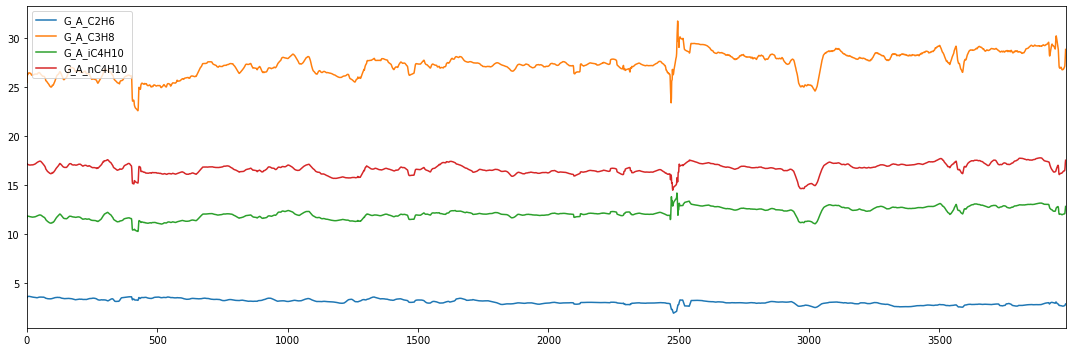

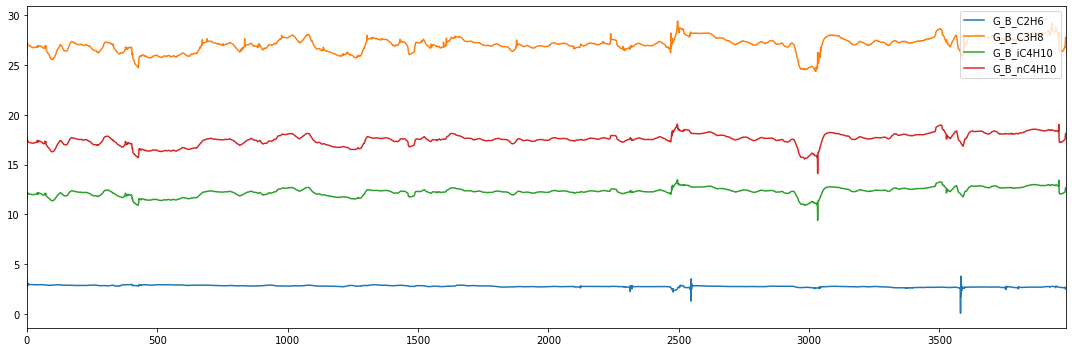

In [1212]:
plt.rcParams["figure.figsize"] = (15,5)

test_data[['G_A_C2H6', 'G_A_C3H8','G_A_iC4H10', 'G_A_nC4H10']][:].plot()

# make room for tick labels
plt.tight_layout()

plt.rcParams["figure.figsize"] = (15,5)

test_data[['G_B_C2H6', 'G_B_C3H8','G_B_iC4H10', 'G_B_nC4H10']][:].plot()

# make room for tick labels
plt.tight_layout()


plt.show()

In [1213]:
predict = pd.DataFrame()

In [1214]:
predict[['timestamp']] = test_data[['timestamp']]

In [1215]:
B = pd.DataFrame({'B_C2H6':[],'B_C3H8':[],'B_iC4H10':[], 'B_nC4H10':[]})

In [1216]:
for i in range(test_data.shape[0]):
    new_line = {}
    B_C2H6 = test_data.loc[i,'G_B_C2H6'] * 100 / test_data.loc[i,'B_rate']
    B_C3H8 = test_data.loc[i,'G_B_C3H8'] * 100 / test_data.loc[i,'B_rate']
    B_iC4H10 = test_data.loc[i,'G_B_iC4H10'] * 100 / test_data.loc[i,'B_rate']
    B_nC4H10 = test_data.loc[i,'G_B_nC4H10'] * 100 / test_data.loc[i,'B_rate']
    
    new_line.update({'B_C2H6':B_C2H6,'B_C3H8':B_C3H8,'B_iC4H10':B_iC4H10,'B_nC4H10': B_nC4H10})
    B = B.append(new_line, ignore_index=True)

In [1217]:
predict = pd.concat([predict,B] , axis=1)

In [1218]:
predict

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-04-30 23:30:00,5.024778,35.786361,16.030659,24.517125
1,2020-05-01 00:00:00,3.464044,36.330634,16.404418,23.453791
2,2020-05-01 00:30:00,4.229034,36.684904,16.495588,23.584034
3,2020-05-01 01:00:00,3.870249,36.502332,16.337210,23.380081
4,2020-05-01 01:30:00,4.034927,36.477091,16.332302,23.363764
...,...,...,...,...,...
3980,2020-07-22 21:30:00,3.735827,37.649394,17.154100,24.549979
3981,2020-07-22 22:00:00,3.733913,37.510186,17.149573,24.538863
3982,2020-07-22 22:30:00,3.706919,37.371593,17.153624,24.526195
3983,2020-07-22 23:00:00,3.694341,37.443959,17.175441,24.540478


In [1219]:
for i in range(0,1):
    predict.drop(i, axis=0, inplace=True)

In [1220]:
predict = predict.reset_index(drop=True)

In [1221]:
predict

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-05-01 00:00:00,3.464044,36.330634,16.404418,23.453791
1,2020-05-01 00:30:00,4.229034,36.684904,16.495588,23.584034
2,2020-05-01 01:00:00,3.870249,36.502332,16.337210,23.380081
3,2020-05-01 01:30:00,4.034927,36.477091,16.332302,23.363764
4,2020-05-01 02:00:00,3.974050,36.482015,16.325723,23.349335
...,...,...,...,...,...
3979,2020-07-22 21:30:00,3.735827,37.649394,17.154100,24.549979
3980,2020-07-22 22:00:00,3.733913,37.510186,17.149573,24.538863
3981,2020-07-22 22:30:00,3.706919,37.371593,17.153624,24.526195
3982,2020-07-22 23:00:00,3.694341,37.443959,17.175441,24.540478


In [1222]:
predict.to_csv('predictSGD.csv', sep=',', header=True, index=False)

In [1223]:
a = pd.read_csv('sample_submission.csv', header = 0, sep = ',')
b = pd.read_csv('predictSGD.csv', header = 0, sep = ',')

In [1224]:
a

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-05-01 00:00:00,4.363701,37.742757,16.843028,24.171264
1,2020-05-01 00:30:00,4.363701,37.742757,16.843028,24.171264
2,2020-05-01 01:00:00,4.363701,37.742757,16.843028,24.171264
3,2020-05-01 01:30:00,4.363701,37.742757,16.843028,24.171264
4,2020-05-01 02:00:00,4.363701,37.742757,16.843028,24.171264
...,...,...,...,...,...
3979,2020-07-22 21:30:00,4.363701,37.742757,16.843028,24.171264
3980,2020-07-22 22:00:00,4.363701,37.742757,16.843028,24.171264
3981,2020-07-22 22:30:00,4.363701,37.742757,16.843028,24.171264
3982,2020-07-22 23:00:00,4.363701,37.742757,16.843028,24.171264


In [1225]:
b

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-05-01 00:00:00,3.464044,36.330634,16.404418,23.453791
1,2020-05-01 00:30:00,4.229034,36.684904,16.495588,23.584034
2,2020-05-01 01:00:00,3.870249,36.502332,16.337210,23.380081
3,2020-05-01 01:30:00,4.034927,36.477091,16.332302,23.363764
4,2020-05-01 02:00:00,3.974050,36.482015,16.325723,23.349335
...,...,...,...,...,...
3979,2020-07-22 21:30:00,3.735827,37.649394,17.154100,24.549979
3980,2020-07-22 22:00:00,3.733913,37.510186,17.149573,24.538863
3981,2020-07-22 22:30:00,3.706919,37.371593,17.153624,24.526195
3982,2020-07-22 23:00:00,3.694341,37.443959,17.175441,24.540478


In [1226]:
#test_data.to_excel('123.xlsx')